# 3 Análise dos dados

# Visualização das base de dados (instancias,atributos e formatos) 

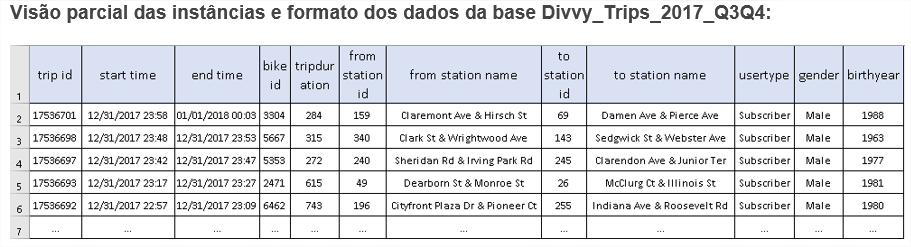

In [1]:
from IPython.display import Image  # incluir imagem ide jupyter
Image("base1.png")

# 3.1 Carregando os dados

In [2]:
import pandas as pd
dataset1= pd.read_csv("Divvy_Trips_2017_Q3.csv") 
dataset2= pd.read_csv("Divvy_Trips_2017_Q4.csv")

In [3]:
dataset = pd.merge(dataset1,dataset2,how='outer')

In [4]:
dataset.shape  #Base unificada com 2277509 instancias e 12 colunas

(2277509, 12)

# 3.2 Tratamento das colunas

In [5]:
dataset.T.head(14)  # a base  contem 12 colunas 
                    # 0 1 2 3  ...  são instancias 

,0,1,2,3,4,5,6,7,8,9,...,2277499,2277500,2277501,2277502,2277503,2277504,2277505,2277506,2277507,2277508
trip_id,16734065,16734064,16734063,16734062,16734061,16734060,16734059,16734058,16734057,16734056,...,16734075,16734074,16734073,16734072,16734071,16734070,16734069,16734068,16734067,16734066
start_time,9/30/2017 23:59:58,9/30/2017 23:59:53,9/30/2017 23:59:06,9/30/2017 23:58:56,9/30/2017 23:58:47,9/30/2017 23:58:45,9/30/2017 23:57:19,9/30/2017 23:57:12,9/30/2017 23:56:59,9/30/2017 23:56:52,...,10/1/2017 0:04,10/1/2017 0:03,10/1/2017 0:02,10/1/2017 0:01,10/1/2017 0:01,10/1/2017 0:01,10/1/2017 0:00,10/1/2017 0:00,10/1/2017 0:00,10/1/2017 0:00
end_time,10/1/2017 00:05:47,10/1/2017 00:05:47,10/1/2017 00:02:52,10/1/2017 00:07:37,10/1/2017 00:07:37,10/1/2017 00:16:37,10/1/2017 00:05:36,10/1/2017 00:00:46,10/1/2017 00:20:17,10/1/2017 00:14:44,...,10/1/2017 0:10,10/1/2017 0:37,10/1/2017 0:12,10/1/2017 0:12,10/1/2017 0:12,10/1/2017 0:15,10/1/2017 0:07,10/1/2017 0:05,10/1/2017 0:06,10/1/2017 0:12
bikeid,1411,3048,2590,551,1287,6132,5235,54,3823,5794,...,2728,6085,1581,3866,88,1099,3688,1416,5396,5802
tripduration,349,354,226,521,530,1072,497,214,1398,1072,...,360,2002,585,664,662,837,366,264,361,741
from_station_id,216,216,141,96,96,478,114,87,90,296,...,229,71,245,220,220,289,45,520,288,135
from_station_name,California Ave & Division St,California Ave & Division St,Clark St & Lincoln Ave,Desplaines St & Randolph St,Desplaines St & Randolph St,Rockwell St & Eastwood Ave,Sheffield Ave & Waveland Ave,Racine Ave & Fullerton Ave,Millennium Park,Broadway & Belmont Ave,...,Southport Ave & Roscoe St,Morgan St & Lake St,Clarendon Ave & Junior Ter,Hampden Ct & Diversey Pkwy,Hampden Ct & Diversey Pkwy,Wells St & Concord Ln,Michigan Ave & Congress Pkwy,Greenview Ave & Jarvis Ave,Larrabee St & Armitage Ave,Halsted St & 21st St
to_station_id,259,259,144,217,217,117,296,127,86,268,...,330,61,303,87,87,226,52,447,289,129
to_station_name,California Ave & Francis Pl,California Ave & Francis Pl,Larrabee St & Webster Ave,Racine Ave (May St) & Fulton St,Racine Ave (May St) & Fulton St,Wilton Ave & Belmont Ave,Broadway & Belmont Ave,Lincoln Ave & Fullerton Ave,Eckhart Park,Lake Shore Dr & North Blvd,...,Lincoln Ave & Addison St,Wood St & Milwaukee Ave,Broadway & Cornelia Ave,Racine Ave & Fullerton Ave,Racine Ave & Fullerton Ave,Racine Ave & Belmont Ave,Michigan Ave & Lake St,Glenwood Ave & Morse Ave,Wells St & Concord Ln,Blue Island Ave & 18th St
usertype,Subscriber,Subscriber,Subscriber,Customer,Subscriber,Subscriber,Subscriber,Subscriber,Customer,Subscriber,...,Subscriber,Subscriber,Subscriber,Subscriber,Subscriber,Subscriber,Customer,Customer,Subscriber,Subscriber


In [6]:
dataset.dtypes

trip_id                int64
start_time            object
end_time              object
bikeid                 int64
tripduration           int64
from_station_id        int64
from_station_name     object
to_station_id          int64
to_station_name       object
usertype              object
gender                object
birthyear            float64
dtype: object

In [7]:
import time
inicio=time.time()

dataset['start_time']=pd.to_datetime(dataset.start_time)
dataset['end_time']=pd.to_datetime(dataset.end_time)
dataset['idade'] = dataset['end_time'].dt.year-dataset['birthyear']

fim=time.time()
tempo=(fim-inicio)
print (tempo/60) 

10.52923674583435


In [8]:
dataset.dtypes

trip_id                       int64
start_time           datetime64[ns]
end_time             datetime64[ns]
bikeid                        int64
tripduration                  int64
from_station_id               int64
from_station_name            object
to_station_id                 int64
to_station_name              object
usertype                     object
gender                       object
birthyear                   float64
idade                       float64
dtype: object

# 3.2.1 Tratamento das instâncias

In [9]:
dataset=dataset.fillna("Null")

In [10]:
Generos=dataset['gender'].value_counts()
Generos.T

Male      1309696
Null       519960
Female     447853
Name: gender, dtype: int64

# 3.3 Visualizar os gêneros

In [11]:
import matplotlib.pyplot as plt

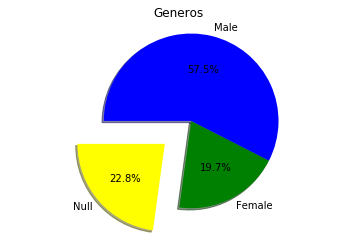

In [12]:
Homems=(dataset.gender=='Male').sum()
Mulheres=(dataset.gender=='Female').sum()
Null=(dataset.gender=='Null').sum()
Total=Homems+Mulheres+Null
labels = ['Null','Female','Male']
values = [Null/Total,Mulheres/Total,Homems/Total]
colors = ['yellow','green','blue']
explode = [0.4,0,0]
plt.title('Generos')
plt.pie(values,labels=labels,colors=colors,explode=explode,
shadow=True,autopct='%1.1f%%',startangle=180);
plt.axis('equal');

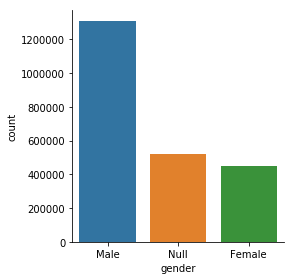

In [13]:
import seaborn as sns
sns.factorplot('gender', data=dataset, kind='count');

In [14]:
Generos=dataset['gender'].value_counts()
Generos

Male      1309696
Null       519960
Female     447853
Name: gender, dtype: int64

# 3.4 Bike com mais tempo de uso

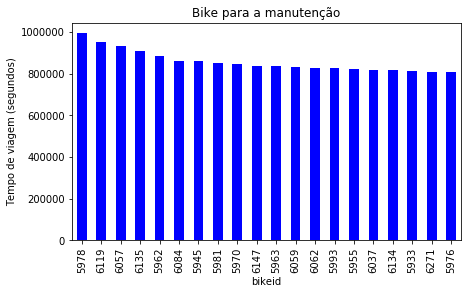

In [16]:
z=dataset[['bikeid','tripduration']]    
bike= z['tripduration'].groupby(z['bikeid']).sum()#agrupa
bike=bike.sort_values(ascending=False)# ordena
num=10 # faixa de analise
bike= bike[(num-num):(num+num)] # filtra de 0 a 20
plt.title('Bike para a manutenção')
plt.ylabel('Tempo de viagem (segundos)');
bike.plot.bar(color="blue");  
plt.gcf().subplots_adjust(left=0.00001)
plt.savefig('bike.pdf')

# 3.5 Horário e dia de maior locação

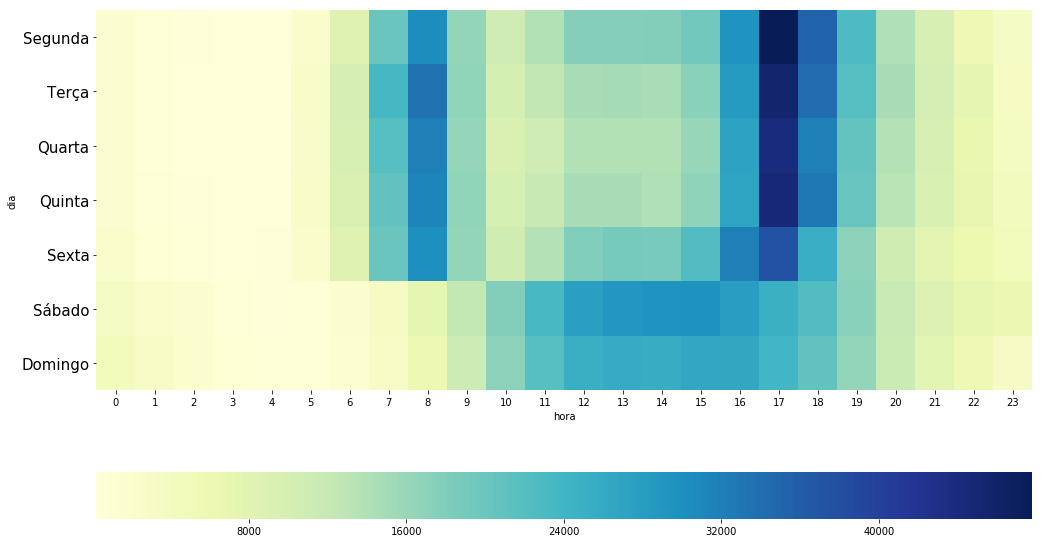

In [22]:
# Plota  grafico  tipo  mapa de calor (Heatmap)
a=dataset[['end_time']]
# Inserir  nova  coluna 
a.insert(len(a.columns), 'dia',a['end_time'].dt.dayofweek)#dia semana
a.insert(len  (a.columns), 'hora',a['end_time'].dt.hour)

d=a[['dia','hora']]
p = d.groupby(['dia','hora']).size().reset_index()
p.columns = ['dia', 'hora', 'freq']

piv1 = p.pivot_table(values="freq",index=["dia"],columns=["hora"], fill_value=0) 
 
fig,ax=plt.subplots(figsize=(20,10))
ax=sns.heatmap(piv1 ,cbar_kws={"orientation": "horizontal"}, cmap="YlGnBu")

ax.set(yticklabels=list(['Segunda','Terça','Quarta',
                         'Quinta','Sexta','Sábado','Domingo']))
ax.set_yticklabels(ax.get_yticklabels(),rotation = 0, fontsize = 15);

plt.gcf().subplots_adjust(left=0.25)
plt.savefig('heatmap3.pdf')

In [23]:
Mais_usada = estacao.groupby(['mes','from_station_name','freq']).size()
Mais_usada

NameError: name 'estacao' is not defined

# 3.6 Analisar o fluxo da estação de partida verso a estação de chegada

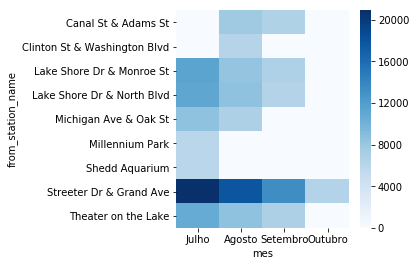

In [27]:
z=dataset[['from_station_name','start_time']]
#assim inserta nova coluna 
z.insert(len(z.columns), 'mes',z['start_time'].dt.month)
c=z[['mes','from_station_name']]

estacao = c.groupby(['mes','from_station_name']).size().reset_index()
estacao.columns = ['mes', 'from_station_name', 'freq']
estacao=estacao.sort_values(by='freq',ascending=False)
x=10 # a x  estacoes  mais  usadas em 2017
estacao= estacao[(x-x):(x+x)] # filtra entre 0 a 10 estação mais  usada 

piv =estacao.pivot_table(values="freq",index=["from_station_name"],
                    columns=["mes"], fill_value=0) 
   
ax=sns.heatmap(piv ,cbar_kws={"orientation": "vertical"},
               cmap="Blues") 
lista_meses=list(['Julho','Agosto','Setembro','Outubro',
                  'Novembro','Dezembro'])
ax.set(xticklabels=lista_meses);
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0,
                   fontsize =10);

plt.gcf().subplots_adjust(left=0.4)
plt.savefig('heatmap1.pdf')


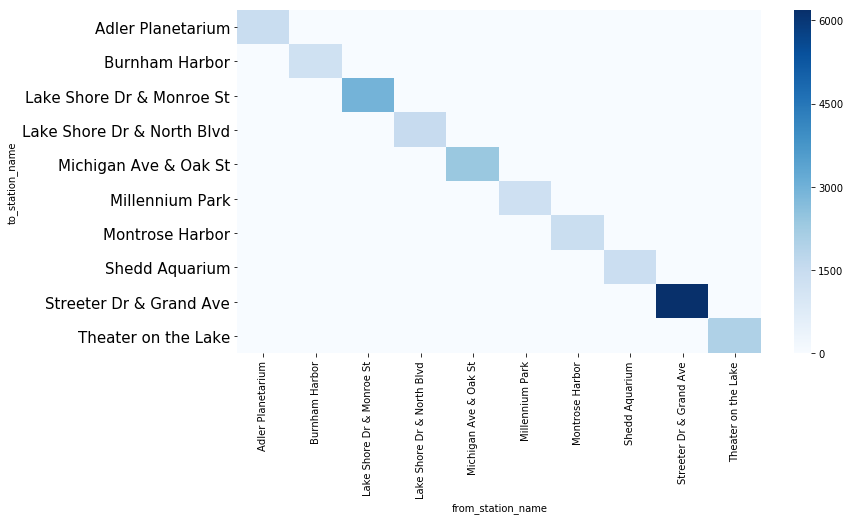

In [29]:
#   local de partida e  o  mesmo  local da  devolucao 
estacao=dataset[['to_station_name','from_station_name']]

estacao_partida_chegada=estacao[
    estacao['to_station_name'] == estacao['from_station_name']];

c=estacao_partida_chegada[['to_station_name','from_station_name']]

estacao = c.groupby(['to_station_name','from_station_name'
              ]).size().reset_index()
estacao.columns = ['to_station_name','from_station_name','freq']
estacao=estacao.sort_values(by='freq',ascending=False)

n=5 # a x  estacoes  mais  usadas em 2017
estacao= estacao[(n-n):(n+n)]

piv = estacao.pivot_table(values="freq",index=["to_station_name"],
                    columns=["from_station_name"], fill_value=0) 
   
fig,ax=plt.subplots(figsize=(14,9))
ax=sns.heatmap(piv ,cbar_kws={"orientation": "vertical"},
               cmap="Blues") 
ax.set_yticklabels(ax.get_yticklabels(), rotation = 0,
                   fontsize =15);

plt.gcf().subplots_adjust(left=0.25,bottom=0.35)
plt.savefig('heatmap2.pdf')